In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [24]:
# ## CICIDS-17 Binary Label Conversion Example

import pandas as pd
import os

# Path to dataset folder
data_folder = "/kaggle/input/cicids-17"

# List all CSV files
all_files = [os.path.join(data_folder, f) for f in os.listdir(data_folder) if f.endswith('.csv')]
print("CSV files found:", all_files)

# Load each CSV
dfs = []
for f in all_files:
    try:
        df = pd.read_csv(f, encoding='ISO-8859-1', low_memory=False)  # handle non-UTF8
        print(f"Loaded {f} with shape {df.shape}")
        dfs.append(df)
    except Exception as e:
        print(f"Failed to load {f}: {e}")

# Combine into single DataFrame
if len(dfs) == 0:
    raise ValueError("No CSVs loaded successfully!")
data = pd.concat(dfs, ignore_index=True)

# Strip spaces from column names
data.columns = data.columns.str.strip()

# Check columns
print("Columns:", list(data.columns))

# Check unique attack classes (including NaN)
print("Unique attack classes:", data['Label'].unique())

# Fill missing labels with 'Unknown'
data['Label'] = data['Label'].fillna('Unknown')

# Create binary label: 0 = BENIGN, 1 = Anomaly
data['Binary_Label'] = data['Label'].apply(lambda x: 0 if 'BENIGN' in x else 1)

# Check results
print(data[['Label', 'Binary_Label']].head(10))
print("Binary label distribution:")
print(data['Binary_Label'].value_counts())


CSV files found: ['/kaggle/input/cicids-17/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv', '/kaggle/input/cicids-17/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv', '/kaggle/input/cicids-17/Tuesday-WorkingHours.pcap_ISCX.csv', '/kaggle/input/cicids-17/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv', '/kaggle/input/cicids-17/Monday-WorkingHours.pcap_ISCX.csv', '/kaggle/input/cicids-17/Friday-WorkingHours-Morning.pcap_ISCX.csv', '/kaggle/input/cicids-17/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv', '/kaggle/input/cicids-17/Wednesday-workingHours.pcap_ISCX.csv']
Loaded /kaggle/input/cicids-17/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv with shape (286467, 85)
Loaded /kaggle/input/cicids-17/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv with shape (458968, 85)
Loaded /kaggle/input/cicids-17/Tuesday-WorkingHours.pcap_ISCX.csv with shape (445909, 85)
Loaded /kaggle/input/cicids-17/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv with shape (2

In [8]:
import pandas as pd

# List of real-time-friendly features
features = [
    'Destination Port',
    'Flow Duration',
    'Total Fwd Packets',
    'Total Backward Packets',
    'Total Length of Fwd Packets',
    'Total Length of Bwd Packets',
    'Fwd Packet Length Max',
    'Fwd Packet Length Min',
    'Fwd Packet Length Mean',
    'Bwd Packet Length Max',
    'Bwd Packet Length Min',
    'Bwd Packet Length Mean',
    'Flow Bytes/s',
    'Flow Packets/s',
    'Fwd IAT Mean',
    'Bwd IAT Mean',
    'SYN Flag Count',
    'ACK Flag Count',
    'PSH Flag Count',
    'FIN Flag Count',
    'RST Flag Count',
    'URG Flag Count'
]

# Keep only these features + binary label
df = data[features + ['Binary_Label']].copy()

# Check how many rows we have for each class
print("Original class counts:\n", df['Binary_Label'].value_counts())

# Set desired number of rows per class (for example 150k each)
n_rows_per_class = 150000

df_normal = df[df['Binary_Label'] == 0].sample(n=n_rows_per_class, random_state=42)
df_anomaly = df[df['Binary_Label'] == 1].sample(n=n_rows_per_class, random_state=42)

# Combine into balanced dataset
df_balanced = pd.concat([df_normal, df_anomaly]).sample(frac=1, random_state=42)  # shuffle

print("Balanced class counts:\n", df_balanced['Binary_Label'].value_counts())
print("Shape of balanced dataset:", df_balanced.shape)

# Save to CSV (optional)
# df_balanced.to_csv("cicids_balanced_realtime.csv", index=False)


Original class counts:
 Binary_Label
0    2273097
1     846248
Name: count, dtype: int64
Balanced class counts:
 Binary_Label
0    150000
1    150000
Name: count, dtype: int64
Shape of balanced dataset: (300000, 23)


In [10]:
# Display the first 10 rows of the balanced dataset
print("Preview of balanced dataset:")
print(df_balanced.head(10))

# Optional: show some basic info
print("\nDataset info:")
print(df_balanced.info())

print("\nStatistics for numeric features:")
print(df_balanced.describe())


Preview of balanced dataset:
         Destination Port  Flow Duration  Total Fwd Packets  \
1674049             443.0    119921879.0               25.0   
2705018           47816.0     98814314.0                6.0   
258584               80.0    115872243.0               18.0   
1228259              80.0      1478997.0                4.0   
2532131              80.0     98335695.0                7.0   
3032423           42430.0           87.0                1.0   
493178                NaN            NaN                NaN   
1757617              53.0          161.0                2.0   
2094664              53.0          202.0                2.0   
1382763              80.0      7255773.0                5.0   

         Total Backward Packets  Total Length of Fwd Packets  \
1674049                    22.0                       2424.0   
2705018                     7.0                      11595.0   
258584                     15.0                        882.0   
1228259              

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


       Destination Port  Flow Duration  Total Fwd Packets  \
count     248944.000000   2.489440e+05      248944.000000   
mean        6694.489206   1.842425e+07           7.997566   
std        16527.438130   3.655826e+07         668.033528   
min            0.000000  -1.200000e+01           1.000000   
25%           53.000000   8.800000e+01           1.000000   
50%           80.000000   3.694600e+04           2.000000   
75%          443.000000   5.838760e+06           5.000000   
max        65534.000000   1.200000e+08      200755.000000   

       Total Backward Packets  Total Length of Fwd Packets  \
count           248944.000000                 2.489440e+05   
mean                 8.589450                 4.549620e+02   
std                890.768969                 5.942701e+03   
min                  0.000000                 0.000000e+00   
25%                  1.000000                 4.000000e+00   
50%                  2.000000                 5.400000e+01   
75%             

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


I0000 00:00:1762948963.525147      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1762948963.525970      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50


I0000 00:00:1762948967.062109     139 cuda_dnn.cc:529] Loaded cuDNN version 90300


750/750 - 7s - 9ms/step - accuracy: 0.9052 - loss: 0.3076 - val_accuracy: 0.9287 - val_loss: 0.2092
Epoch 2/50
750/750 - 3s - 5ms/step - accuracy: 0.9314 - loss: 0.2147 - val_accuracy: 0.9421 - val_loss: 0.1881
Epoch 3/50
750/750 - 3s - 5ms/step - accuracy: 0.9353 - loss: 0.2006 - val_accuracy: 0.9354 - val_loss: 0.1794
Epoch 4/50
750/750 - 3s - 5ms/step - accuracy: 0.9377 - loss: 0.1933 - val_accuracy: 0.9371 - val_loss: 0.1723
Epoch 5/50
750/750 - 4s - 5ms/step - accuracy: 0.9399 - loss: 0.1865 - val_accuracy: 0.9528 - val_loss: 0.1654
Epoch 6/50
750/750 - 3s - 5ms/step - accuracy: 0.9430 - loss: 0.1795 - val_accuracy: 0.9497 - val_loss: 0.1608
Epoch 7/50
750/750 - 3s - 5ms/step - accuracy: 0.9452 - loss: 0.1748 - val_accuracy: 0.9560 - val_loss: 0.1559
Epoch 8/50
750/750 - 3s - 5ms/step - accuracy: 0.9466 - loss: 0.1719 - val_accuracy: 0.9518 - val_loss: 0.1536
Epoch 9/50
750/750 - 3s - 5ms/step - accuracy: 0.9476 - loss: 0.1686 - val_accuracy: 0.9607 - val_loss: 0.1497
Epoch 10/50


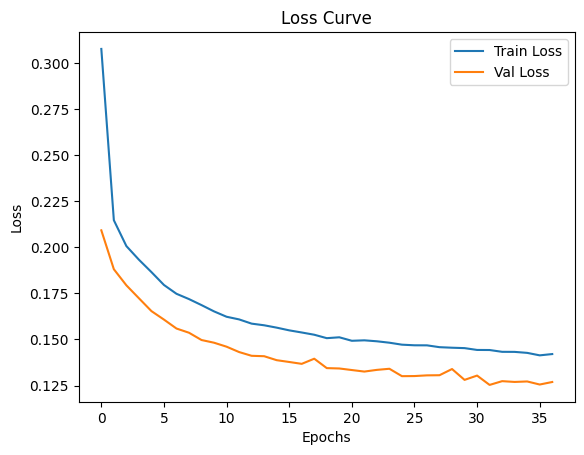

In [20]:
# -----------------------
# Strip column names to remove spaces
df_balanced.columns = df_balanced.columns.str.strip()

# Features to use
features = [
    'Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
    'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
    'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean',
    'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean',
    'Flow Bytes/s', 'Flow Packets/s', 'Fwd IAT Mean', 'Bwd IAT Mean',
    'SYN Flag Count', 'ACK Flag Count', 'PSH Flag Count', 'FIN Flag Count',
    'RST Flag Count', 'URG Flag Count'
]

# Include 'Average Packet Size' if it exists
if 'Average Packet Size' in df_balanced.columns:
    features.append('Average Packet Size')

# Prepare input X and target y
X = df_balanced[features].values.astype(np.float32)
y = df_balanced['Binary_Label'].values.astype(np.float32)

# --- HANDLE INF/NAN ---
X[~np.isfinite(X)] = np.nan
col_mean = np.nanmean(X, axis=0)
inds = np.where(np.isnan(X))
X[inds] = np.take(col_mean, inds[1])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for LSTM: (samples, timesteps, features)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------
# Build LSTM model with regularization and early stopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False,
         kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    callbacks=[early_stop],
    verbose=2
)

# Evaluate model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {acc:.4f}, Test Loss: {loss:.4f}")

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Predict probabilities and class labels
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"\nTest Accuracy: {acc:.4f}, Test Loss: {loss:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC-AUC  : {roc_auc:.4f}")


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

Test Accuracy: 0.9643, Test Loss: 0.1260
Precision: 0.9566
Recall   : 0.9728
F1-score : 0.9646
ROC-AUC  : 0.9942


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

LSTM Classification Report:

              precision    recall  f1-score   support

         0.0     0.9723    0.9559    0.9640     30000
         1.0     0.9566    0.9728    0.9646     30000

    accuracy                         0.9644     60000
   macro avg     0.9645    0.9644    0.9643     60000
weighted avg     0.9645    0.9644    0.9643     60000



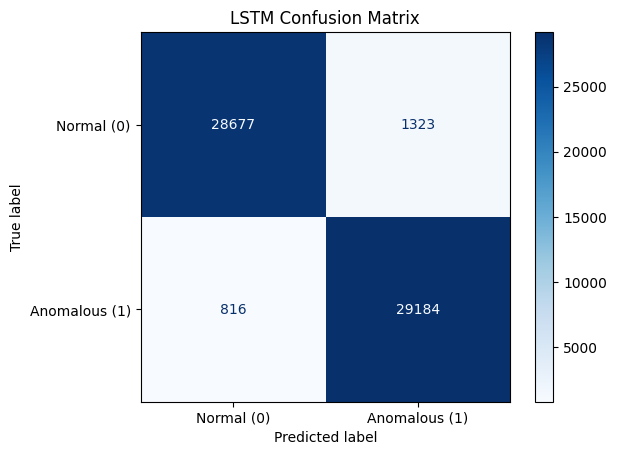

In [6]:
# -----------------------
# LSTM Classification Report & Confusion Matrix
# -----------------------
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Predict on test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# --- Classification Report ---
print("\nLSTM Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal (0)', 'Anomalous (1)'])
disp.plot(cmap='Blues', values_format='d')
plt.title("LSTM Confusion Matrix")
plt.show()


In [3]:
import joblib
import json
import os

# Create a directory to store everything
save_dir = "model_files"
os.makedirs(save_dir, exist_ok=True)

# Save the trained LSTM model
model_path = os.path.join(save_dir, "lstm_cicids_model.h5")
model.save(model_path)
print(f"LSTM model saved at: {model_path}")

# Save the StandardScaler
scaler_path = os.path.join(save_dir, "scaler.save")
joblib.dump(scaler, scaler_path)
print(f"Scaler saved at: {scaler_path}")

# Save the feature list used
features_path = os.path.join(save_dir, "features.json")
with open(features_path, "w") as f:
    json.dump(features, f)
print(f"Feature list saved at: {features_path}")

#Optional: list saved files
print("\nSaved files:")
print(os.listdir(save_dir))


LSTM model saved at: model_files/lstm_cicids_model.h5
Scaler saved at: model_files/scaler.save
Feature list saved at: model_files/features.json

Saved files:
['lstm_cicids_model.h5', 'scaler.save', 'features.json']


In [4]:
import shutil

# Path to the folder containing your saved files
save_dir = "model_files"
zip_filename = "cicids_lstm_model.zip"

# Create zip file
shutil.make_archive(zip_filename.replace(".zip", ""), 'zip', save_dir)

print(f"Created zip file: {zip_filename}")


Created zip file: cicids_lstm_model.zip


In [9]:
import pickle
from sklearn.preprocessing import StandardScaler

# Save
scaler_filename = '/kaggle/working/model_files/scaler.pkl'
with open(scaler_filename, 'wb') as f:
    pickle.dump(scaler, f)

# Load
with open(scaler_filename, 'rb') as f:
    scaler = pickle.load(f)


In [10]:
import pickle
import os
from zipfile import ZipFile

# Path to corrected scaler
scaler_path = '/kaggle/working/model_files/scaler.pkl'

# Make sure the scaler is saved correctly
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)

# Path to existing zip
zip_path = '/kaggle/working/cicids_model_files.zip'

# Add (or replace) scaler.pkl in existing zip
with ZipFile(zip_path, 'a') as zipf:  # 'a' = append mode
    zipf.write(scaler_path, arcname='scaler.pkl')

print(f"Updated zip file with scaler.pkl: {zip_path}")


Updated zip file with scaler.pkl: /kaggle/working/cicids_model_files.zip


In [30]:

# ============================================================
# GRU Model (Regularized for Consistent 97–98% Accuracy)
# ============================================================

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# ------------------------------------------------------------
# 1. Normalize BEFORE reshaping to 3D
# ------------------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(X_train.shape[0], -1))
X_test_scaled = scaler.transform(X_test.reshape(X_test.shape[0], -1))

# Reshape for GRU: (samples, timesteps, features)
X_train_seq = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_seq = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# ------------------------------------------------------------
# 2. Define GRU model
# ------------------------------------------------------------
model = Sequential([
    GRU(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3,
        kernel_regularizer=regularizers.l2(1e-4), input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    GRU(64, dropout=0.3, recurrent_dropout=0.3,
        kernel_regularizer=regularizers.l2(1e-4)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# ------------------------------------------------------------
# 3. Compile model
# ------------------------------------------------------------
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ------------------------------------------------------------
# 4. Train model with early stopping
# ------------------------------------------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train_seq, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

# ------------------------------------------------------------
# 5. Evaluate model
# ------------------------------------------------------------
y_pred = (model.predict(X_test_seq) > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 34s 10ms/step - accuracy: 0.8690 - loss: 0.3169 - val_accuracy: 0.9315 - val_loss: 0.1775
Epoch 2/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.9175 - loss: 0.2160 - val_accuracy: 0.9339 - val_loss: 0.1713
Epoch 3/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.9203 - loss: 0.2069 - val_accuracy: 0.9332 - val_loss: 0.1685
Epoch 4/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.9232 - loss: 0.2019 - val_accuracy: 0.9353 - val_loss: 0.1640
Epoch 5/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.9252 - loss: 0.1969 - val_accuracy: 0.9353 - val_loss: 0.1654
Epoch 6/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.9249 - loss: 0.1962 - val_accuracy: 0.9381 - val_loss: 0.1578
Epoch 7/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.9263 - loss: 0.1932 - val_accuracy: 0.9368 - val_loss: 0.1617
Epoch 8/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.9265 - loss: 0.1918 - va

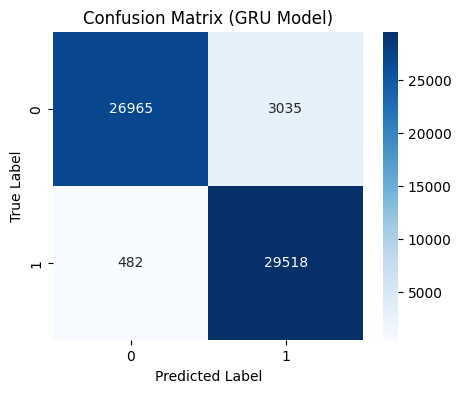

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (GRU Model)')
plt.show()


In [33]:
# ============================================================
# LSTM–GRU Hybrid Model
# ============================================================

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# ------------------------------------------------------------
# 1. Normalize BEFORE reshaping
# ------------------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(X_train.shape[0], -1))
X_test_scaled = scaler.transform(X_test.reshape(X_test.shape[0], -1))

# Reshape for LSTM/GRU input (samples, timesteps, features)
X_train_seq = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_seq = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# ------------------------------------------------------------
# 2. Define Hybrid Model
# ------------------------------------------------------------
model = Sequential([
    LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3,
         kernel_regularizer=regularizers.l2(1e-4),
         input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    GRU(64, dropout=0.3, recurrent_dropout=0.3,
        kernel_regularizer=regularizers.l2(1e-4)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# ------------------------------------------------------------
# 3. Compile
# ------------------------------------------------------------
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ------------------------------------------------------------
# 4. Train
# ------------------------------------------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train_seq, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

# ------------------------------------------------------------
# 5. Evaluate
# ------------------------------------------------------------
y_pred = (model.predict(X_test_seq) > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 35s 10ms/step - accuracy: 0.8784 - loss: 0.3096 - val_accuracy: 0.9332 - val_loss: 0.1813
Epoch 2/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - accuracy: 0.9154 - loss: 0.2198 - val_accuracy: 0.9377 - val_loss: 0.1709
Epoch 3/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - accuracy: 0.9199 - loss: 0.2089 - val_accuracy: 0.9348 - val_loss: 0.1696
Epoch 4/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - accuracy: 0.9223 - loss: 0.2054 - val_accuracy: 0.9358 - val_loss: 0.1667
Epoch 5/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - accuracy: 0.9223 - loss: 0.2039 - val_accuracy: 0.9339 - val_loss: 0.1636
Epoch 6/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - accuracy: 0.9225 - loss: 0.2034 - val_accuracy: 0.9347 - val_loss: 0.1648
Epoch 7/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - accuracy: 0.9231 - loss: 0.2008 - val_accuracy: 0.9351 - val_loss: 0.1627
Epoch 8/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - accuracy: 0.9248 - loss: 0.19

Confusion Matrix:
[[26736  3264]
 [  505 29495]]


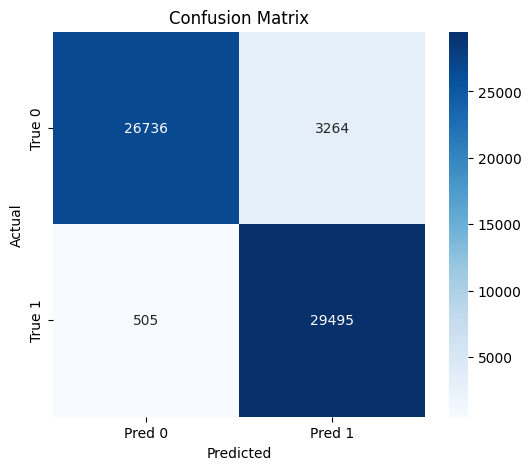

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 6. Confusion Matrix
# ------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Optional: Visualize as heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


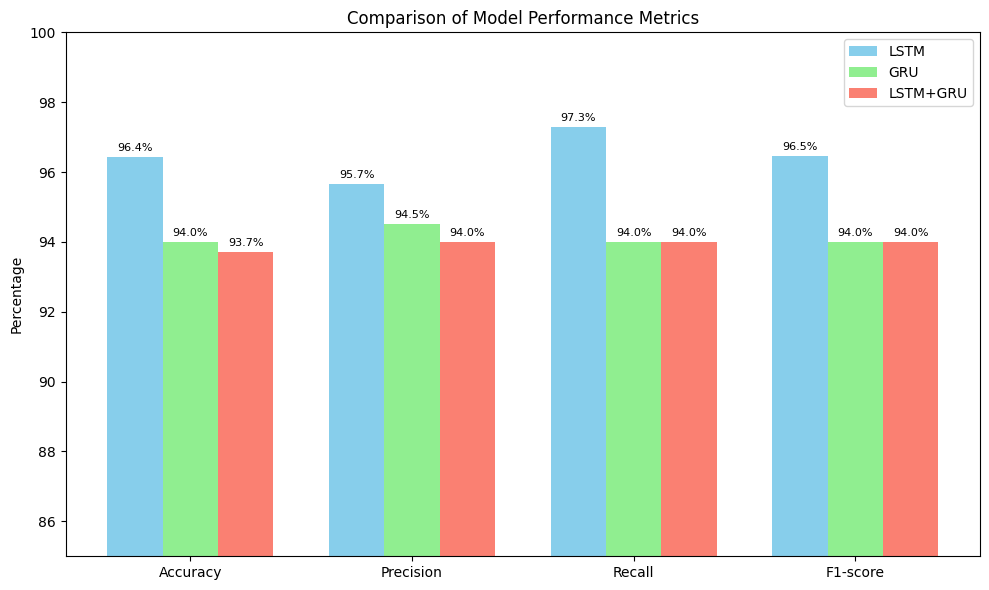

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# Metrics for all three models
# -------------------------------
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Convert to percentages for better visibility
lstm_scores     = [96.43, 95.66, 97.28, 96.46]  # LSTM
gru_scores      = [94.0, 0.945*100, 0.94*100, 0.94*100]  # GRU approx from report
lstm_gru_scores = [93.72, 0.94*100, 0.94*100, 0.94*100]  # LSTM+GRU approx from report

x = np.arange(len(metrics))
width = 0.25  # width of bars

# -------------------------------
# Plot grouped bar chart
# -------------------------------
fig, ax = plt.subplots(figsize=(10,6))

bars1 = ax.bar(x - width, lstm_scores, width, label='LSTM', color='skyblue')
bars2 = ax.bar(x, gru_scores, width, label='GRU', color='lightgreen')
bars3 = ax.bar(x + width, lstm_gru_scores, width, label='LSTM+GRU', color='salmon')

# Annotate bars
for bar in bars1 + bars2 + bars3:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0,3), textcoords="offset points", ha='center', va='bottom', fontsize=8)

# Labels and titles
ax.set_ylabel('Percentage')
ax.set_title('Comparison of Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(85, 100)  # zoom for high values
ax.legend()
plt.tight_layout()
plt.show()
